# DAY 5

## K Means Clusturing

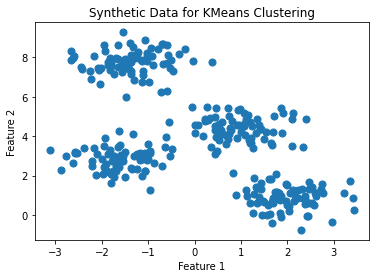

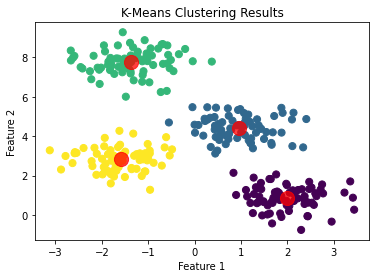

Silhouette Score: 0.68


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate synthetic data for demonstration
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Data for KMeans Clustering')
plt.show()

# Implement K-Means
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)  

# Predict the clusters for the data points
y_kmeans = kmeans.predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering Results')
plt.show()

# Evaluate the clustering with silhouette score
sil_score = silhouette_score(X, y_kmeans)
print(f'Silhouette Score: {sil_score:.2f}')


## Principal Component Analysis

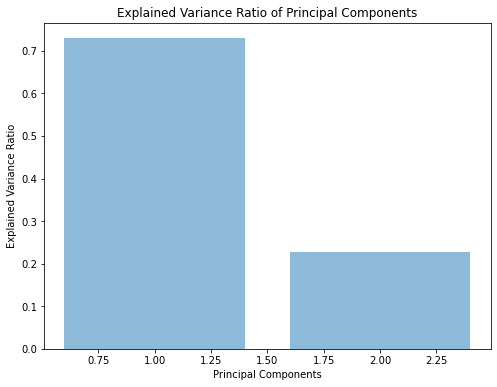

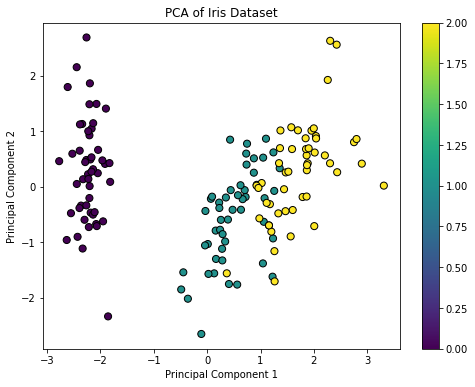

In [6]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Load Datasets
data = load_iris()
X = data.data
y = data.target

# Standarize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components = 2) # Reduce to 2 principal components
X_pca = pca.fit_transform(X_scaled)

# Plot the explained variance ratio
plt.figure(figsize=(8,6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1),pca.explained_variance_ratio_, alpha = 0.5, align = 'center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.show()

# Visualize the PCA tranformed data
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.colorbar()
plt.show()

## Cross validation

In [10]:
# Importing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Create a RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# Define KFold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform Cross validation
scores = cross_val_score(clf,X,y,cv=kf)

print(f'Cross Validation Scores: {scores}')
print(f'Mean Cross Validation Score: {scores.mean():.2f}')


Cross Validation Scores: [1.         0.96666667 0.93333333 0.93333333 0.96666667]
Mean Cross Validation Score: 0.96


### Hyperparameter Tuning with GridSearchCV

In [17]:
# Loading Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
import matplotlib.pyplot as plt

# Load Dataset
data = load_iris()
X = data.data
y = data.target

# Create a RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# Define KFold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform Cross validation
scores = cross_val_score(clf,X,y,cv=kf)

print(f'Cross Validation Scores: {scores}')
print(f'Mean Cross Validation Score: {scores.mean():.2f}')

# Define the parameter grid
param_grid = {
    'n_estimators' : [10,20,100],
    'max_depth' : [None, 10, 20, 30],
    'min_samples_split' : [2,5,20],
    'min_samples_leaf' : [1,2,4]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=1)

# Fit the model
grid_search.fit(X,y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters : {best_params}')
print(f'Best Cross Validation Score: {best_score: .2f}')

Cross Validation Scores: [1.         0.96666667 0.93333333 0.93333333 0.96666667]
Mean Cross Validation Score: 0.96
Best Parameters : {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best Cross Validation Score:  0.97
